In [1]:
pip install komm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 4.1 MB/s eta 0:00:00


In [2]:
!pip install tsai


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.9/298.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.0 MB/s eta 0:00:00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tsai import all
from tsai.basics import *

In [2]:
import datagen

In [3]:
splitter = RandomSplitter (valid_pct=0.33, seed=None)


In [4]:
X = np.load("Noisy.npy")
y = np.load("Params.npy")
splits = splitter(y)

In [5]:
X = X.reshape(X.shape[0], 1, X.shape[1])

In [ ]:
print(len(splits[1]))

10000


In [7]:
print(X.shape)
xreal = np.real(X.reshape(250000,1,500))
ximag = np.imag(X.reshape(250000,1,500))

x = np.concatenate((xreal,ximag),axis=1)
x.shape

(250000, 1, 500)


(250000, 2, 500)

arch: InceptionTimePlus(c_in=2 c_out=1 seq_len=500 arch_config={} kwargs={'custom_head': functools.partial(<class 'tsai.models.layers.lin_nd_head'>, d=3)})


epoch,train_loss,valid_loss,_rmse,time
0,35772832.000000,24850720.000000,4985.047852,01:07
1,469785.343750,299166.343750,546.961121,01:07
2,428605.843750,229299.218750,478.851959,01:06
3,222821.171875,100799.453125,317.489227,01:06
4,78326.750000,38476.691406,196.154800,01:07
5,97972.617188,327809.218750,572.546204,01:06
6,40953.417969,84728.359375,291.081421,01:06
7,27037.205078,21659.238281,147.170792,01:08
8,27941.828125,15420.319336,124.178589,01:05
9,16442.853516,15167.612305,123.156921,01:06


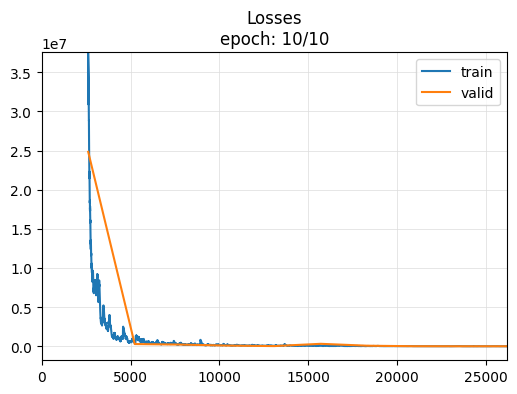

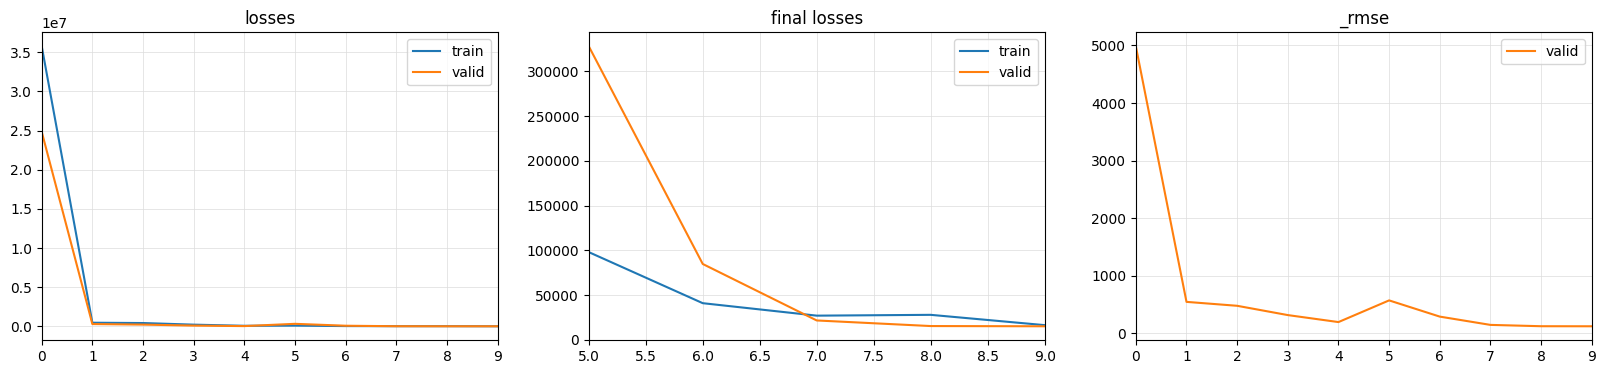

In [8]:

tfms = [None, TSRegression()]
batch_tfms = TSStandardize(by_sample=False)
reg = TSRegressor(x, y, splits=splits, path='models', arch="InceptionTimePlus",tfms=tfms,device= torch.device("cuda"), batch_tfms=batch_tfms, metrics=rmse, cbs=ShowGraph(), verbose=True)
reg.fit_one_cycle(10, 1e-3)
reg.export("reg.pkl")




In [9]:
print(X.shape)

(25000, 1, 500)


In [9]:

raw_preds, target, preds = reg.get_X_preds(x, y)


In [10]:
np.save("MLPreds.npy", raw_preds)

In [ ]:
print(preds)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

from numpy import r_

Ns = 500
fs = 2048000
t = r_[0.0:Ns]/fs            # time points

In [ ]:
len(preds)

50000

In [ ]:
X_test = X[splits[1]]
y_test = y[splits[1]]

In [ ]:
X_test.shape

(10000, 1, 500)

In [ ]:
offset = 25000
for i in range(15):
    j = i + offset
    # plt.plot(X[j,0,:])
    plt.plot(y[j,1] * np.sin(2*np.pi*y[j,0]*t + y[j,2]) )
    plt.plot(preds[j][1] * np.sin(2*np.pi*preds[j][0]*t + preds[j][2]) )
    plt.show()

In [ ]:
offset = 100
for i in range(15):
    j = i + offset
    plt.plot(X_test[j,0,:])
    plt.plot(y_test[j,1] * np.sin(2*np.pi*y_test[j,0]*t + y[j,2]) )
    plt.plot(preds[j][1] * np.sin(2*np.pi*preds[j][0]*t + preds[j][2]) )
    plt.show()

In [ ]:
np.save("predictions.npy",np.array(preds))